In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from IPython.display import clear_output
from matplotlib import gridspec

In [12]:
BATCH = 1
IMG_DIM = 28 # Input dim, W or H
IMG_CH = 1 # Input Channels
K = 4
H1_CH = 10
H2_CH = 1

img = tf.placeholder(tf.float32, (BATCH, IMG_DIM, IMG_DIM, IMG_CH))

W1 = tf.Variable(tf.random_normal((K, K, IMG_CH, H1_CH))) # input dim, k size, k size, output_ch
b1 = tf.Variable(tf.random_normal((BATCH, 9, 9, H1_CH))) # batch, ceil((img_w-k_w+1)/stride), '', output_ch

W2 = tf.Variable(tf.random_normal((K, K, H1_CH, H2_CH)))
b2 = tf.Variable(tf.random_normal((BATCH, 3, 3, H2_CH)))

h1 = tf.nn.tanh(tf.nn.conv2d(img, W1, [1,3,3,1], "VALID") + b1)
h2 = tf.nn.conv2d(h1, W2, [1,2,2,1], "VALID") + b2

t = tf.placeholder(tf.float32, (1, 3, 3, 1))

cost = tf.reduce_mean(tf.square(h2 - t))
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [13]:
if 'session' in globals():
    session.close()
    
session = tf.InteractiveSession()
session.run(tf.initialize_all_variables())

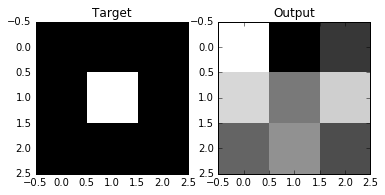

In [16]:
# Make up a target for h2 and plot current output

x = np.random.random_sample((1, IMG_DIM, IMG_DIM, 1))
#targ = np.random.random_sample((1, 3, 3, 1))
targ = np.zeros((1, 3, 3, 1))
targ[0,1,1,0] = 1

def vis():
    gs = gridspec.GridSpec(1, 2)
    
    plt.subplot(gs[0, 0])
    plt.title('Target')
    plt.imshow(targ[0,:,:,0], interpolation='nearest', cmap=plt.cm.gray)
    
    plt.subplot(gs[0, 1])
    plt.title('Output')
    plt.imshow(h2.eval({img: x})[0,:,:,0], interpolation='nearest', cmap=plt.cm.gray)
    
vis()

cost(90): 7.46102386984e-06


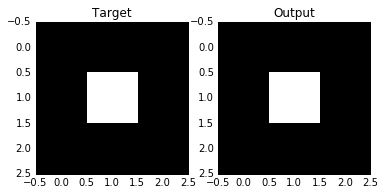

In [17]:
# Train
for i in range(100):
    session.run(train, {img: x, t: targ})
    if i % 10 == 0:
        clear_output(wait=True)
        print('cost({}): {}'.format(i, cost.eval({img: x, t: targ})))
        vis()
        plt.show()

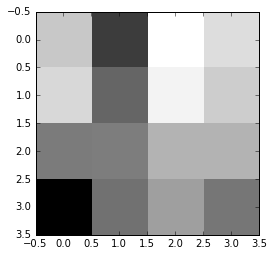

In [21]:
W1e = W1.eval()

for i in range(W1e.shape[3]):
    clear_output(wait=True)
    plt.imshow(W1e[:,:,0,i], interpolation='nearest', cmap=plt.cm.gray)
    plt.show()

(1, 1, 1, 1)


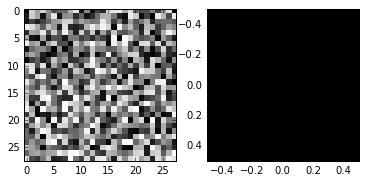

In [34]:
# Pooling

pool = tf.nn.max_pool(img, [1, 28, 28, 1], [1, 1, 1, 1], 'VALID')

pooled = pool.eval({img: x})

print(pooled.shape)

gs = gridspec.GridSpec(1, 2)

plt.subplot(gs[0, 0])
f = plt.imshow(x[0, :, :, 0], interpolation='nearest', cmap=plt.cm.gray)

plt.subplot(gs[0, 1])
f = plt.imshow(pooled[0, :, :, 0], interpolation='nearest', cmap=plt.cm.gray)

In [37]:
print(np.max(x))
print(pooled)

0.999349662153
[[[[ 0.99934965]]]]


(475, 632, 3)


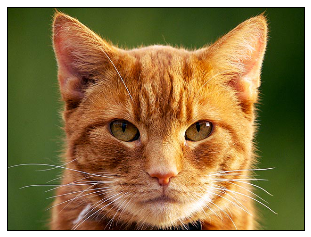

In [141]:
cat = plt.imread('./../../data/images/cat.jpg')
plt.xticks([])
plt.yticks([])
print(cat.shape)
f = plt.imshow(cat[:, :])

(1, 200, 200, 3)


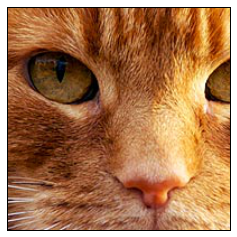

In [144]:
cat = plt.imread('./../../data/images/cat.jpg')

cat = cat[200:400, 200:400, :]
cat = cat.reshape(1, 200, 200, 3)
plt.xticks([])
plt.yticks([])
plt.imshow(cat[0, :, :])

print(cat.shape)

(1, 50, 50, 3)


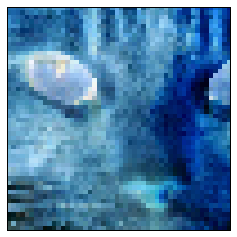

In [145]:
rgb_img = tf.placeholder(tf.float32, (1,200,200,3))
k = 4
pool_img = tf.nn.max_pool(rgb_img, [1, k, k, 1], [1, k, k, 1], padding='VALID')

pooled = pool_img.eval({rgb_img: cat})

print(pooled.shape)
plt.xticks([])
plt.yticks([])
f = plt.imshow(pooled[0, :, :], interpolation='nearest')

(1, 1, 3)


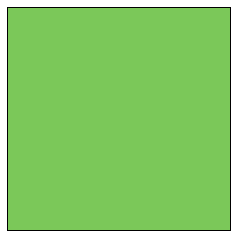

In [149]:
mean_img = np.array([[[np.mean(cat[0, :, :, c]) for c in range(3)]]])
print(mean_img.shape)
plt.xticks([])
plt.yticks([])
f = plt.imshow(mean_img)

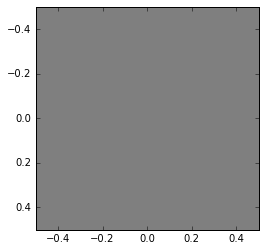

In [151]:
from ipywidgets import interact

def rgb(r,g,b):
    img = np.array([[[r,g,b]]])
    
    plt.imshow(img)
    
interact(rgb, r=(0,1,.1),g=(0,1,.1),b=(0,1,.1))